In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import scipy.integrate as integrate  

In [87]:
#Lets use Gtonnes CO2 as a common unit. 
#Molecular weight C is 12, and CO2 is 44
# 1 tonne = 1000kg

In [115]:
#read in the historic emisisons data set
#data accessed on 23.08.17 from: http://edgar.jrc.ec.europa.eu/overview.php?v=CO2ts1990-2015
df_world_Gt = pd.read_csv('CO2_1970-2015_dataset_of_CO2_report_2016_edgar.csv', header = 11, index_col = 0, usecols = list(range(0,47)), skiprows = list(range(12,224)) )/(10^6)

In [116]:

df_world_Gt

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
World,1.321810e+06,1.313096e+06,1379488.00,1.462820e+06,1.458112e+06,1452818.5,1.536156e+06,1581683.0,1.635473e+06,1.682835e+06,...,2.566304e+06,2.663261e+06,2.677729e+06,2.651803e+06,2805054.5,2.893815e+06,2914003.25,2.972671e+06,3.007006e+06,3005142.50
EU28,3.556213e+05,3.548109e+05,364729.75,3.831146e+05,3.732026e+05,363747.5,3.849159e+05,384106.0,3.942566e+05,4.098025e+05,...,3.527008e+05,3.494324e+05,3.423347e+05,3.136036e+05,323607.0,3.120533e+05,309454.75,3.016935e+05,2.853011e+05,289139.25


In [90]:
rows = list(df_world_Gt.index)
cols = list(df_world_Gt.columns.values)


In [91]:
#Now import the projection data
#data accessed on 24.08.17 from: http://edgar.jrc.ec.europa.eu/overview.php?v=CO2ts1990-2015
df_R26_PgC = pd.read_csv('R26_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R45_PgC = pd.read_csv('R45_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R60_PgC = pd.read_csv('R60_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
df_R85_PgC = pd.read_csv('R85_bulk.csv',header = 0, nrows = 18, skiprows = list(range(1,12)), usecols = list(range(16)))
#Currently only importing data for concentrations, forcing and CO2 emisssions (not other gas emmisions)

In [92]:
#Convert the data to Gtonees of CO2 a year from Pg (same as Gt) of C
#initialise the new dataframes. I fear that this changes the values of df_R26_PgC so care if running multiple times:
df_R26_GtCO2 = df_R26_PgC
df_R45_GtCO2 = df_R45_PgC
df_R60_GtCO2 = df_R60_PgC
df_R85_GtCO2 = df_R85_PgC


In [93]:
#Now convert them
#keep heading columns the same, change unit column and adjust the numerical values according to (Mr(CO2))/(Mr(C))
df_R26_GtCO2.loc[:,'2000':'2100'] = df_R26_PgC.loc[:,'2000':'2100']*44/12
df_R26_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R4.5
df_R45_GtCO2.loc[:,'2000':'2100'] = df_R45_PgC.loc[:,'2000':'2100']*44/12
df_R45_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R60
df_R60_GtCO2.loc[:,'2000':'2100'] = df_R60_PgC.loc[:,'2000':'2100']*44/12
df_R60_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'

#R85
df_R85_GtCO2.loc[:,'2000':'2100'] = df_R85_PgC.loc[:,'2000':'2100']*44/12
df_R85_GtCO2.loc[:,'Unit'] = 'GtCO2/yr'





In [94]:
df_R26_GtCO2

,Region,Scenario,Variable,Unit,2000,2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,R5ASIA,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,7.788000,11.198000,13.585000,15.931667,12.734333,8.272000,5.540333,1.991000,0.018333,-0.755333,-1.309000,-0.638000
1,R5LAM,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,2.698667,2.761000,2.951667,2.533667,2.005667,1.708667,1.400667,1.158667,0.748000,0.480333,0.447333,0.128333
2,R5MAF,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,3.032333,3.439333,3.182667,4.176333,3.835333,2.794000,2.123000,2.669333,2.123000,1.529000,0.924000,0.315333
3,R5OECD,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,12.162333,12.738000,13.156000,11.949667,8.477333,4.326667,2.269667,0.968000,-0.707667,-0.876333,-0.975333,-1.195333
4,R5REF,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,3.226667,3.479667,3.347667,3.028667,2.079000,1.320000,1.081667,0.671000,0.216333,0.051333,-0.066000,-0.146667
5,World,IMAGE - RCP3-PD (2.6),CO2 emissions - Total,GtCO2/yr,28.908000,33.612333,36.219333,37.620000,29.135333,18.421333,12.419000,7.461667,2.398000,0.429000,-0.982667,-1.540000
6,R5ASIA,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,6.482667,9.562667,12.045000,14.725333,12.059667,7.971333,5.148000,1.499667,-0.403333,-1.221000,-1.837000,-1.111000
7,R5LAM,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,1.360333,1.510667,1.686667,1.807667,1.441000,1.257667,1.224667,0.854333,0.469333,0.209000,-0.007333,-0.223667
8,R5MAF,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,2.130333,2.603333,2.779333,2.940667,2.533667,2.266000,2.170667,2.013000,1.591333,1.070667,0.594000,0.165000
9,R5OECD,IMAGE - RCP3-PD (2.6),CO2 emissions - Fossil fuels and Industry,GtCO2/yr,11.700333,12.276000,12.653667,11.652667,8.231667,3.978333,2.266000,0.407000,-1.144000,-1.353000,-1.481333,-1.661000


In [95]:
start_year_scen_big = '2000'
end_year_scen_big = '2100'
start_year_hist_big = '1970'
end_year_hist_big = '2015'

In [96]:
start_year_scen_small = '2000'
end_year_scen_small = '2030'
start_year_hist_small = '2000'
end_year_hist_small = '2015'

In [97]:
# Define data sets to plot (take out of pandas as plotting different x-axes)
#Historic data 
#y values (emissions)
historic = df_world_Gt.loc['World', start_year_hist_big : end_year_hist_big].T.as_matrix().T 
# x values (years)
x_hist=[int(xx) for xx in list(df_world_Gt.loc[:, start_year_hist_big : end_year_hist_big])] 

In [98]:
# short time scale
#Historic data 
#y values (emissions)
historic_small = df_world_Gt.loc['World', start_year_hist_small : end_year_hist_small].T.as_matrix().T 
# x values (years)
x_hist_small=[int(xx) for xx in list(df_world_Gt.loc[:, start_year_hist_small : end_year_hist_small])] 


In [99]:
#Scenarios - long time scales
# y values. Row 11 is The world data for CO2 emissions from industry and fossil fuel burning. 
RF2_6 = list(df_R26_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF4_5 = list(df_R45_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF6_0 = list(df_R60_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
RF8_5 = list(df_R85_GtCO2.loc[11, start_year_scen_big:end_year_scen_big])
#x values
x_scen = [int(xx) for xx in list(df_R26_GtCO2.loc[:, start_year_scen_big:end_year_scen_big])]


In [100]:
#Scenarios - short time scales
# y values. Row 11 is The world data for CO2 emissions from industry and fossil fuel burning. 
RF2_6_small = list(df_R26_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF4_5_small = list(df_R45_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF6_0_small = list(df_R60_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
RF8_5_small = list(df_R85_GtCO2.loc[11, start_year_scen_small:end_year_scen_small])
#x values
x_scen_small = [int(xx) for xx in list(df_R26_GtCO2.loc[:, start_year_scen_small:end_year_scen_small])]



In [101]:
params = {'legend.fontsize': 16,
          'figure.figsize': (12, 12),
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [102]:
RF2_6


[24.695000000000004,
 29.227,
 32.343666666666664,
 34.056000000000004,
 26.242333333333335,
 16.628333333333334,
 11.682000000000002,
 5.2030000000000003,
 0.42533333333333329,
 -1.5876666666666666,
 -3.1899999999999999,
 -3.4136666666666664]

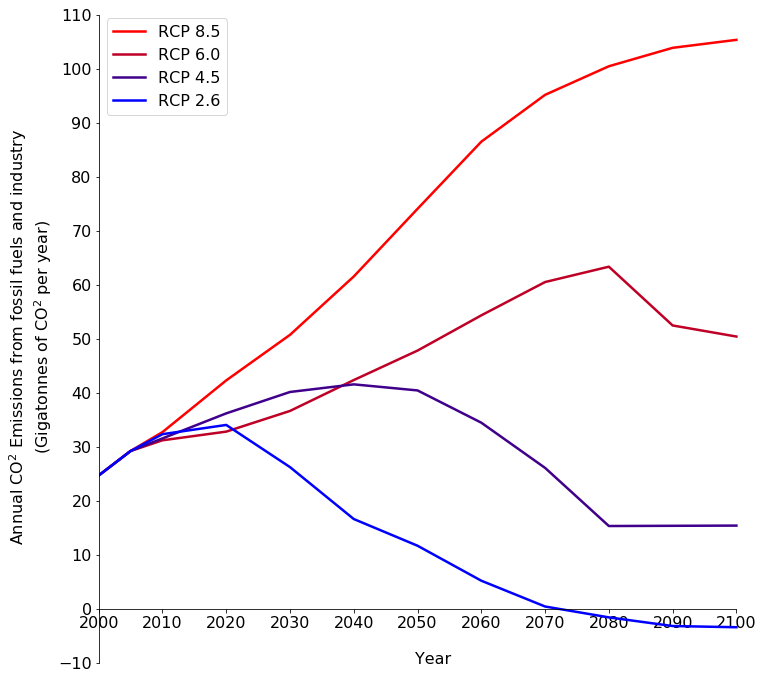

In [103]:
#RCP's only 

#Set up the plot
fig_area_comp, ax_area_comp = plt.subplots()

#plot future scenarios
ax_area_comp.plot(x_scen, RF8_5, label = 'RCP 8.5', color = (1, 0, 0), linewidth = 2.5)
ax_area_comp.plot(x_scen, RF6_0, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF4_5, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF2_6, label = 'RCP 2.6', color = (0, 0, 1), linewidth = 2.5 )

#Adjust axes so that the y axis is at 2000 and the x axis is at 0
pylab.xlim(xmin= int(start_year_scen_big))
#ax_area_comp.spines['left'].set_position(('axes', 1970))
ax_area_comp.spines['right'].set_color('none')
ax_area_comp.spines['bottom'].set_position('zero')
ax_area_comp.spines['top'].set_color('none')
ax_area_comp.spines['left'].set_smart_bounds(True)
ax_area_comp.spines['bottom'].set_smart_bounds(True)
ax_area_comp.xaxis.set_ticks_position('bottom')
ax_area_comp.yaxis.set_ticks_position('left')

#Add legend and annotations
ax_area_comp.legend()


            
                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO^{2}}$ per year)')
plt.xticks(np.arange(min(x_scen), 2109, 10))
plt.yticks(np.arange(-10, max(RF8_5)+10, 10))

plt.savefig('RCP_scenarios.png')

                      

plt.show()



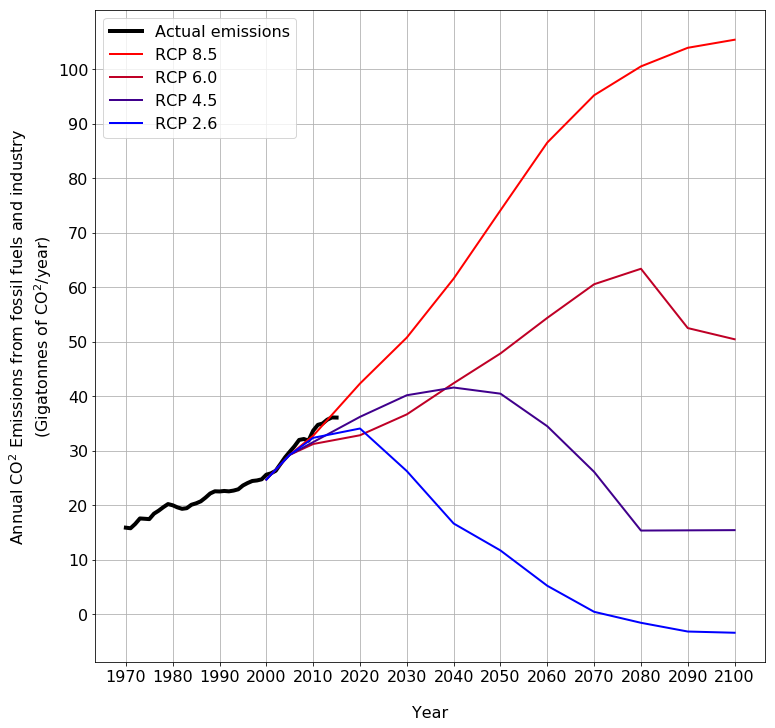

In [104]:
fig_line_comp, ax_line_comp = plt.subplots()

ax_line_comp.plot(x_hist, historic, label = 'Actual emissions', color = '0', linewidth = 4 )
ax_line_comp.plot(x_scen, RF8_5, label = 'RCP 8.5', color = (1, 0, 0), linewidth = 2)
ax_line_comp.plot(x_scen, RF6_0, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2 )
ax_line_comp.plot(x_scen, RF4_5, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2 )
ax_line_comp.plot(x_scen, RF2_6, label = 'RCP 2.6', color = (0, 0, 1), linewidth = 2 )

pylab.plot.xlim =(min(x_hist), max(x_scen)+1) # Not working
pylab.plot.ylim =(0, max(RF8_5)+ 10 ) # Not working
ax_line_comp.legend()
ax_line_comp.grid(True, which='both')
#ax_line_comp.axhline(y=0, color='k', linewidth = 1.5 )
#ax_line_comp.axvline(x=0, color='k', linewidth = 1.5 )


plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO^{2}}$/year)')

plt.xticks(np.arange(min(x_hist), max(x_scen)+1, 10))
plt.yticks(np.arange(0, max(RF8_5)+1, 10))

plt.show()




In [105]:
print("what" + u"\u00b0")
print('3.7' + u"\u00b0" +'C')

what°
3.7°C


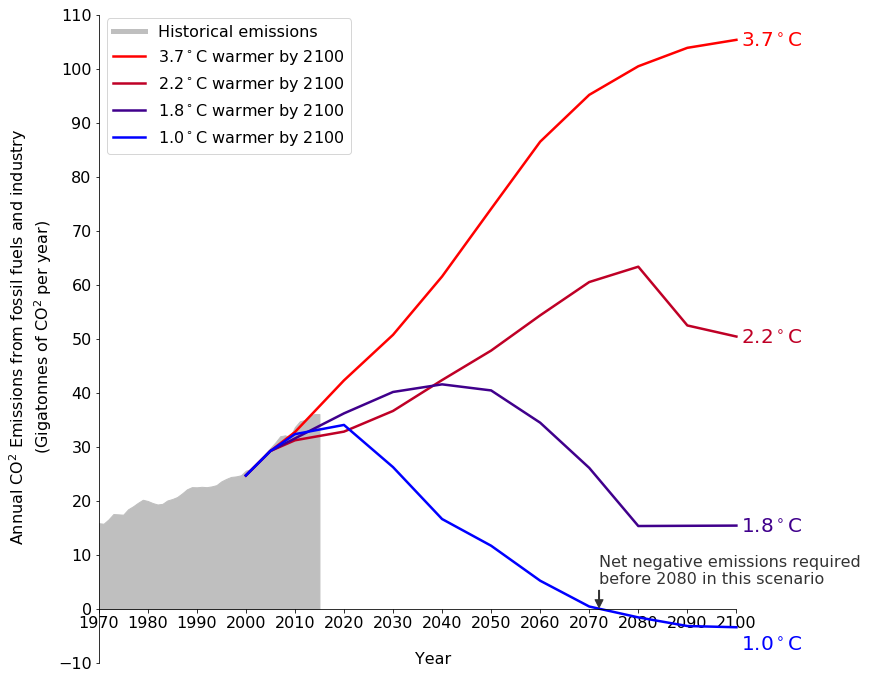

In [106]:
#Big scale plot - 1970 to 2100
#Set up the plot
fig_area_comp, ax_area_comp = plt.subplots()

#plot historical emissions as an area. Include an empty series of the same colour to give a legend entry
ax_area_comp.stackplot(x_hist, historic, color = '0.75')
ax_area_comp.plot([], [], label = 'Historical emissions', color = '0.75', linewidth = 5)

#plot future scenarios
ax_area_comp.plot(x_scen, RF8_5, label = '3.7$^\circ$C warmer by 2100', color = (1, 0, 0), linewidth = 2.5)
ax_area_comp.plot(x_scen, RF6_0, label = '2.2$^\circ$C warmer by 2100', color = (0.75, 0, 0.15), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF4_5, label = '1.8$^\circ$C warmer by 2100', color = (0.25, 0, 0.55), linewidth = 2.5 )
ax_area_comp.plot(x_scen, RF2_6, label = '1.0$^\circ$C warmer by 2100', color = (0, 0, 1), linewidth = 2.5 )

#Adjust axes so that the y axis is at 1970 and the x axis is at 0
pylab.xlim(xmin= int(start_year_hist_big))
#ax_area_comp.spines['left'].set_position(('axes', 1970))
ax_area_comp.spines['right'].set_color('none')
ax_area_comp.spines['bottom'].set_position('zero')
ax_area_comp.spines['top'].set_color('none')
ax_area_comp.spines['left'].set_smart_bounds(True)
ax_area_comp.spines['bottom'].set_smart_bounds(True)
ax_area_comp.xaxis.set_ticks_position('bottom')
ax_area_comp.yaxis.set_ticks_position('left')

#Add legend and annotations
ax_area_comp.legend()

ax_area_comp.annotate('Net negative emissions required \nbefore 2080 in this scenario',
            color = '0.2',
            fontsize = 16,
            xy=(2072,0), 
            xytext=(2072, 10), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 8, headlength = 8, color = '0.2' ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('1.0$^\circ$C',
            color = (0, 0, 1),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2101, RF2_6[11]- 1.5), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('1.8$^\circ$C',
            color = (0.25, 0, 0.55),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2101, RF4_5[11]+ 1.5), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('2.2$^\circ$C',
            color = (0.75, 0, 0.15),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2101, RF6_0[11]+1.5), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0 ),
            horizontalalignment='left',
            verticalalignment='top')

ax_area_comp.annotate('3.7$^\circ$C',
            color = (1, 0, 0),
            fontsize = 20,
            xy=(2100,0),  
            xytext=(2101, RF8_5[11] + 1.5), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 0, headwidth = 0, headlength = 0, color = (0, 0, 0.7) ),
            horizontalalignment='left',
            verticalalignment='top')
            
            
                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO^{2}}$ per year)')
plt.xticks(np.arange(min(x_hist), 2109, 10))
plt.yticks(np.arange(-10, max(RF8_5)+10, 10))

plt.savefig('scenarios_vs_reality.png')

                      

plt.show()


    

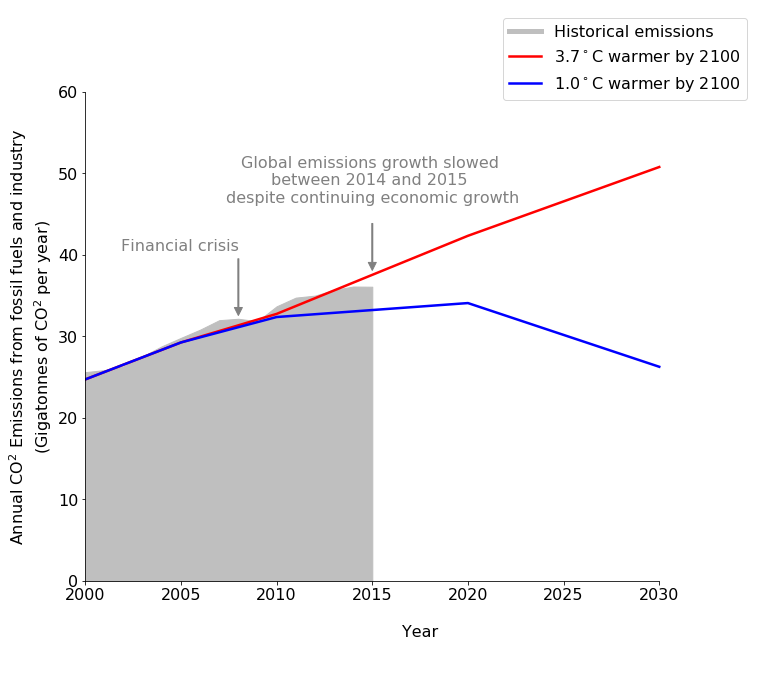

In [107]:
#Small scale plot - 2000 to 2030
#Set up the plot
fig_area_comp_small, ax_area_comp_small = plt.subplots()

ax_area_comp_small.stackplot(x_hist_small, historic_small, color = '0.75')
ax_area_comp_small.plot([], [], label = 'Historical emissions', color = '0.75', linewidth = 5)


ax_area_comp_small.plot(x_scen_small, RF8_5_small, label = '3.7$^\circ$C warmer by 2100', color = (1, 0, 0), linewidth = 2.5)
#ax_area_comp_small.plot(x_scen_small, RF6_0_small, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2 )
#ax_area_comp_small.plot(x_scen_small, RF4_5_small, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2 )
ax_area_comp_small.plot(x_scen_small, RF2_6_small, label = '1.0$^\circ$C warmer by 2100', color = (0, 0, 1), linewidth = 2.5 )


#Adjust axes so that the y axis is at 2000 and the x axis is at 0
pylab.xlim(xmin= int(start_year_hist_small))
pylab.ylim(ymin= 0)
#ax_area_comp_small.spines['left'].set_position(('axes', 2000))
ax_area_comp_small.spines['right'].set_color('none')
ax_area_comp_small.spines['bottom'].set_position('zero')
ax_area_comp_small.spines['top'].set_color('none')
ax_area_comp_small.spines['left'].set_smart_bounds(True)
ax_area_comp_small.spines['bottom'].set_smart_bounds(True)
ax_area_comp_small.xaxis.set_ticks_position('bottom')
ax_area_comp_small.yaxis.set_ticks_position('left')

#Add legend and annotations
ax_area_comp_small.legend()
ax_area_comp_small.annotate('Financial crisis',
                    fontsize = 16,
                    color = '0.5',
                    xy=(2008,df_world_Gt.loc['World','2008']),  # In the year 2008
                    xytext=(2008, df_world_Gt.loc['World','2008']+ 8), 
                    textcoords='data',
                    arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 8, headlength = 8, color = '0.5' ),
                    horizontalalignment='right',
                    verticalalignment='bottom')

ax_area_comp_small.annotate('Global emissions growth slowed \nbetween 2014 and 2015 \ndespite continuing economic growth',
            fontsize = 16,
            color = '0.5',
            xy=(2015,df_world_Gt.loc['World','2015']),  # In the year 2008
            xytext=(2015, df_world_Gt.loc['World','2015']+ 10), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.2, width = 1, headwidth = 8, headlength = 8, color = '0.5' ),
            horizontalalignment='center',
            verticalalignment='bottom')

                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Annual $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry \n(Gigatonnes of $\mathregular{CO^{2}}$ per year)')
plt.xticks(np.arange(2000, 2040, 5))
plt.yticks(np.arange(-10, max(RF8_5_small)+20, 10))

plt.savefig('scenarios_vs_reality_zoomed.png')

                    
plt.show()


    

In [108]:
RF2_6_long = [0] + RF2_6
print(RF2_6_long)
len(RF2_6_long)


[0, 24.695000000000004, 29.227, 32.343666666666664, 34.056000000000004, 26.242333333333335, 16.628333333333334, 11.682000000000002, 5.2030000000000003, 0.42533333333333329, -1.5876666666666666, -3.1899999999999999, -3.4136666666666664]


13

In [109]:
#The most important thing (more or less) is cumulative emissions so lets have a look at those

#Cumulatively sum the historic emissions data - use 01.01.2000 as a starting point as that is where scenarios start
# Points will be plotted at the start of each year so add 0 at the start for emissions at 01.01.2000
cum_hist = [0] + list(np.cumsum(historic_small))
x_hist_cum = list(range(int(start_year_hist_small), int(end_year_hist_small)+2))

#Use the trapezium rule to integrate the scenario data. The scenario data gives average values for certain years. 
#When using the trapezium rule here we are taking the annual averages as being at the midpoint of the year and
#integrating betweeen them. As such the first half of 2000 is missed and so needs to be added - hence the 0.5*RF2_6[0]
cum_RF2_6 = 0.5*RF2_6[0] + integrate.cumtrapz(RF2_6, x_scen )
cum_RF4_5 = 0.5*RF4_5[0] + integrate.cumtrapz(RF4_5, x_scen)
cum_RF6_0 = 0.5*RF6_0[0] +  integrate.cumtrapz(RF6_0, x_scen)
cum_RF8_5 = 0.5*RF8_5[0] + integrate.cumtrapz(RF8_5, x_scen)
#plot values half way through the year
x_scen_cum = [2005.5, 2010.5, 2020.5, 2030.5, 2040.5, 2050.5, 2060.5, 2070.5, 2080.5, 2090.5, 2100.5]


print(x_hist_small)
print(historic_small)
print(x_hist_cum)
print(cum_hist)
print(x_scen)
print(RF2_6)
print(x_scen_cum)
print(cum_RF2_6)




[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[ 25.58663   25.834186  26.307655  27.530555  28.760032  29.792009
  30.795649  31.959132  32.132749  31.821632  33.660654  34.725783
  34.968039  35.672051  36.084066  36.06171 ]
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
[0, 25.58663, 51.420816000000002, 77.728470999999999, 105.25902600000001, 134.019058, 163.81106700000001, 194.60671600000001, 226.56584800000002, 258.69859700000001, 290.52022900000003, 324.18088300000005, 358.90666600000003, 393.87470500000001, 429.54675600000002, 465.63082200000002, 501.69253200000003]
[2000, 2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
[24.695000000000004, 29.227, 32.343666666666664, 34.056000000000004, 26.242333333333335, 16.628333333333334, 11.682000000000002, 5.2030000000000003, 0.42533333333333329, -1.5876666666666666, -3.1899999999999999, -3.4136666666666664]
[2005.5,

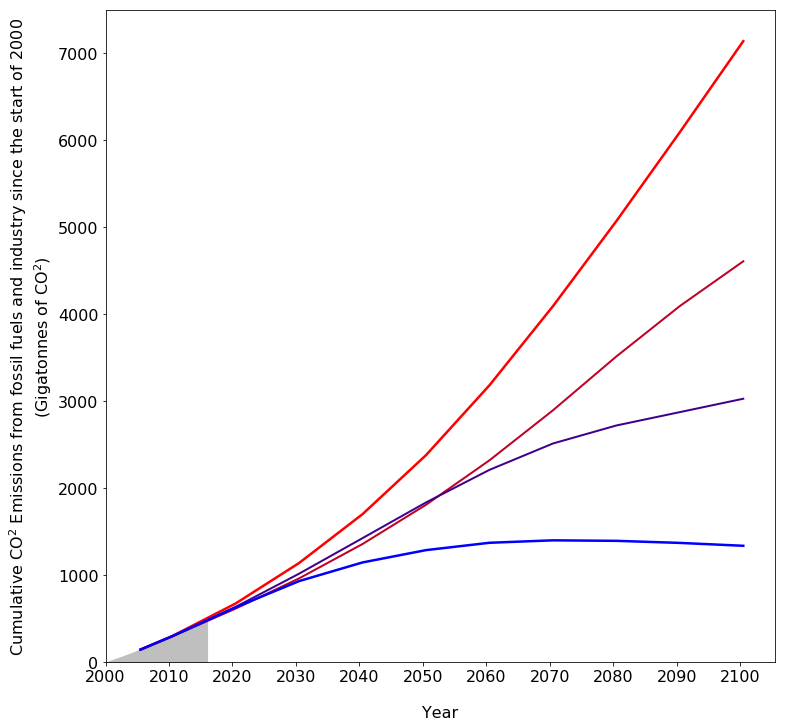

In [110]:
#Set up the plot
fig_cum, ax_cum = plt.subplots()

#plot historical emissions
ax_cum.stackplot( x_hist_cum, cum_hist, color = '0.75')
ax_cum.plot([], [], label = 'Cumulative historical emissions', color = '0.75', linewidth = 5)

#plot scenario emissions
ax_cum.plot(x_scen_cum, cum_RF8_5, label = 'RCP 8.5', color = (1, 0, 0), linewidth = 2.5)
ax_cum.plot(x_scen_cum, cum_RF6_0, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2 )
ax_cum.plot(x_scen_cum, cum_RF4_5, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2 )
ax_cum.plot(x_scen_cum, cum_RF2_6, label = 'RCP 2.6', color = (0, 0, 1), linewidth = 2.5 )


#Adjust axes so that the y axis is at 2000 and the x axis is at 0
pylab.xlim(xmin= 2000)
pylab.ylim(ymin= 0)
#ax_area_comp_small.spines['left'].set_position(('axes', 2000))
ax_area_comp_small.spines['right'].set_color('none')
ax_area_comp_small.spines['bottom'].set_position('zero')
ax_area_comp_small.spines['top'].set_color('none')
ax_area_comp_small.spines['left'].set_smart_bounds(True)
ax_area_comp_small.spines['bottom'].set_smart_bounds(True)
ax_area_comp_small.xaxis.set_ticks_position('bottom')
ax_area_comp_small.yaxis.set_ticks_position('left')

                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Cumulative $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry since the start of 2000 \n(Gigatonnes of $\mathregular{CO^{2}}$)')
plt.xticks(np.arange(2000, 2101, 10))
#plt.yticks(np.arange(0,701,100))

plt.savefig('cumulative_scenarios_vs_reality.png')



                    
plt.show()

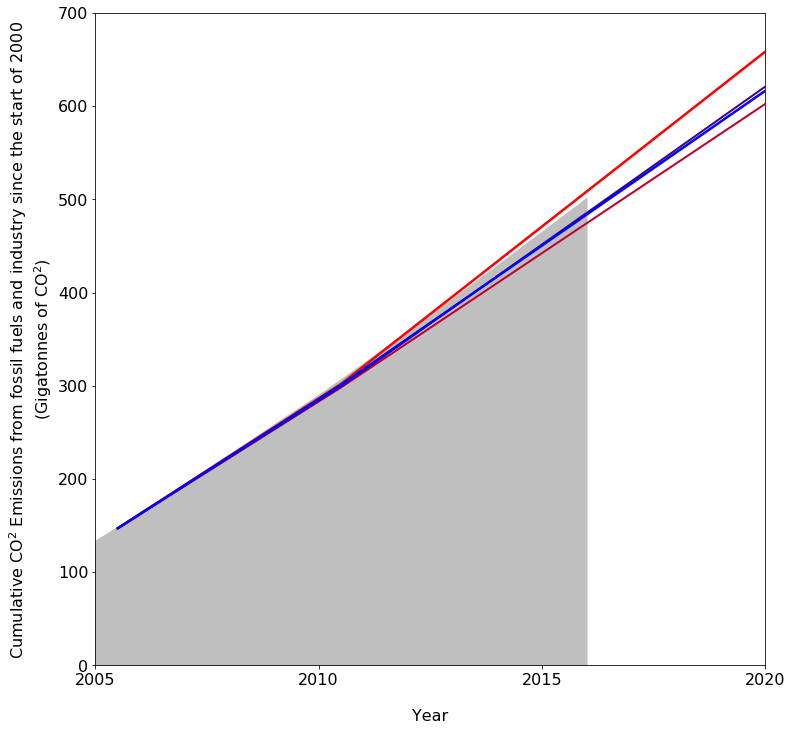

In [111]:
#Zoomed in version
#Set up the plot
fig_cum, ax_cum = plt.subplots()

#plot historical emissions
ax_cum.stackplot( x_hist_cum, cum_hist, color = '0.75')
ax_cum.plot([], [], label = 'Cumulative historical emissions', color = '0.75', linewidth = 5)

#plot scenario emissions
ax_cum.plot(x_scen_cum, cum_RF8_5, label = 'RCP 8.5', color = (1, 0, 0), linewidth = 2.5)
ax_cum.plot(x_scen_cum, cum_RF6_0, label = 'RCP 6.0', color = (0.75, 0, 0.15), linewidth = 2 )
ax_cum.plot(x_scen_cum, cum_RF4_5, label = 'RCP 4.5', color = (0.25, 0, 0.55), linewidth = 2 )
ax_cum.plot(x_scen_cum, cum_RF2_6, label = 'RCP 2.6', color = (0, 0, 1), linewidth = 2.5 )


#Adjust axes so that the y axis is at 2000 and the x axis is at 0
pylab.xlim(xmin= 2005, xmax = 2020)
pylab.ylim(ymin= 0, ymax = 700)
#ax_area_comp_small.spines['left'].set_position(('axes', 2000))
ax_area_comp_small.spines['right'].set_color('none')
ax_area_comp_small.spines['bottom'].set_position('zero')
ax_area_comp_small.spines['top'].set_color('none')
ax_area_comp_small.spines['left'].set_smart_bounds(True)
ax_area_comp_small.spines['bottom'].set_smart_bounds(True)
ax_area_comp_small.xaxis.set_ticks_position('bottom')
ax_area_comp_small.yaxis.set_ticks_position('left')

                      
#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Cumulative $\mathregular{CO^{2}}$ Emissions from fossil fuels and industry since the start of 2000 \n(Gigatonnes of $\mathregular{CO^{2}}$)')
plt.xticks(np.arange(2005, 2021, 5))
plt.yticks(np.arange(0,701,100))

plt.savefig('cumulative_scenarios_vs_reality_zoomed.png')



                    
plt.show()
    

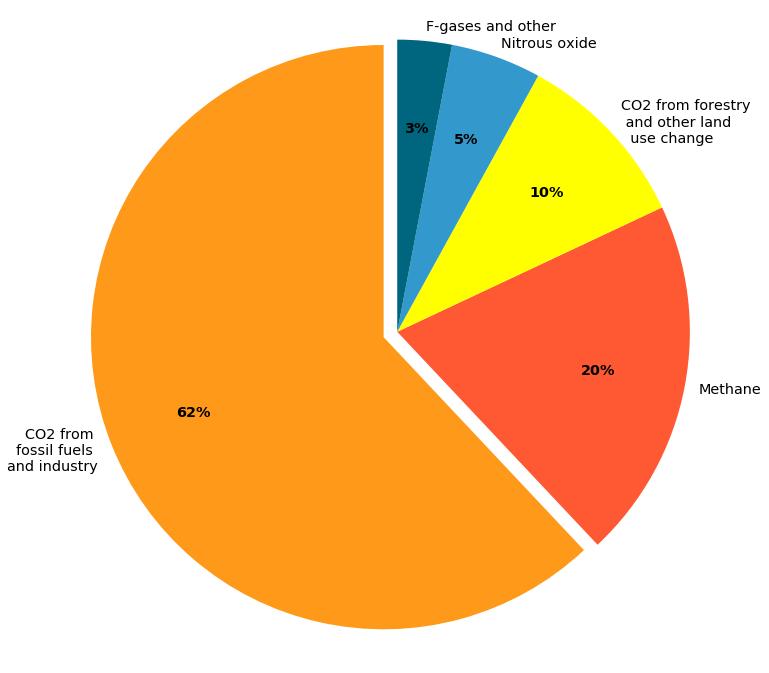

In [112]:
#Was it justified to only look at CO2 emissions from fossil fuels and industry. 
#data from IPPC fifth assesment report figure 1.6. GWP100 AR5
from matplotlib import font_manager as fm
labels = 'CO2 from \nfossil fuels \nand industry',  'Methane', 'CO2 from forestry \n and other land \n  use change','Nitrous oxide', 'F-gases and other'
sizes = [62, 20, 10, 5, 3]
explode = (0.05, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, pctdistance = 0.7 , labeldistance = 1.05,  colors = [(1,0.6,0.1),(1,0.35,0.2),(1,1,0),(0.2,0.6,0.8), (0,0.4,0.5)])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


proptease_percents = fm.FontProperties(weight = 'bold')
proptease_percents.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease_percents)

proptease_labels = fm.FontProperties()
proptease_labels.set_size('x-large')
plt.setp(texts, fontproperties=proptease_labels)

plt.savefig('CO2_equivalent_breakdown.png', dpi=50)



plt.show()